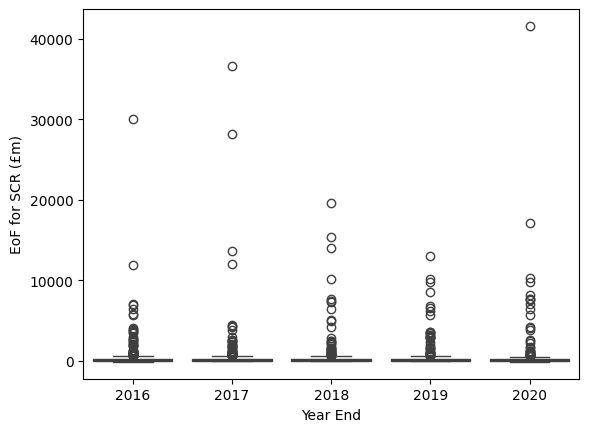

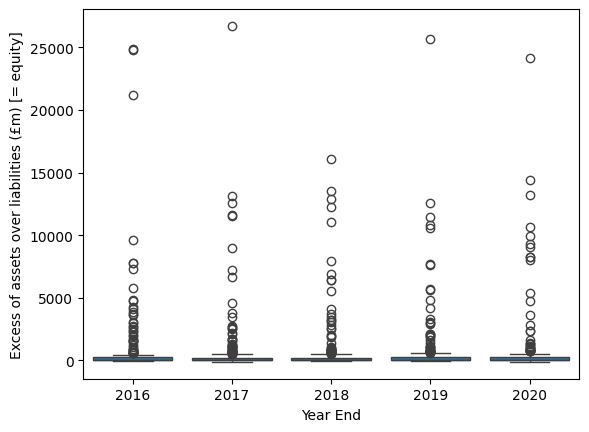

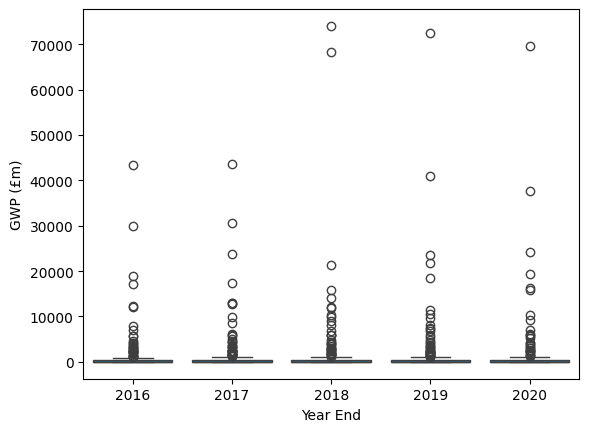

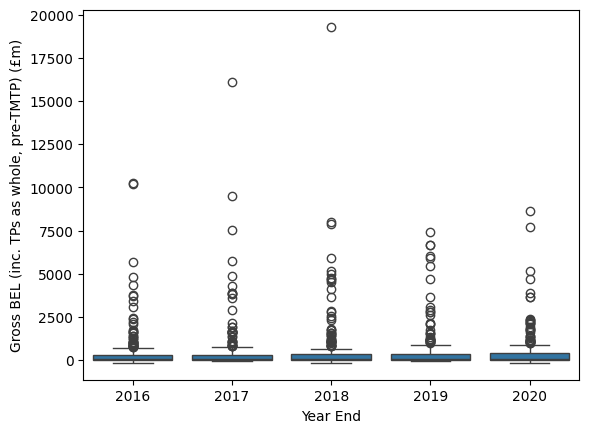

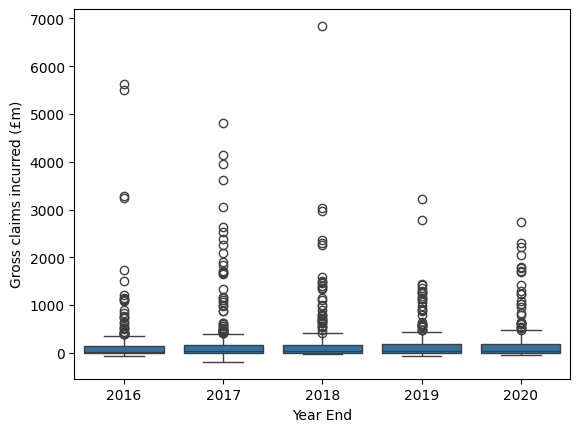

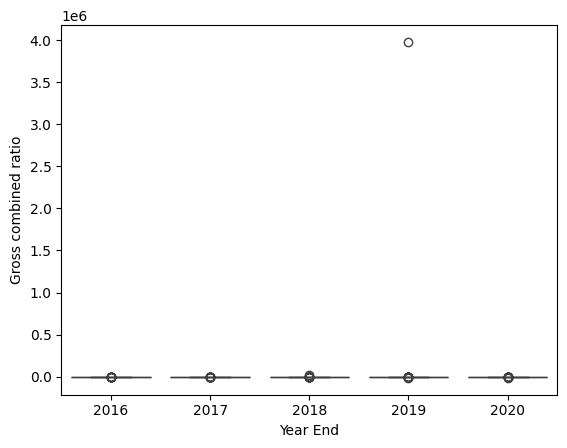

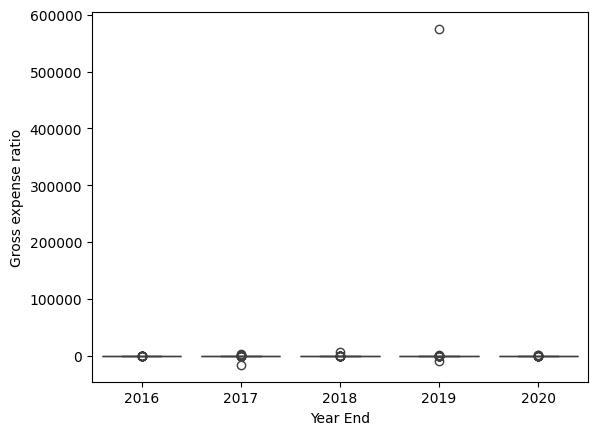

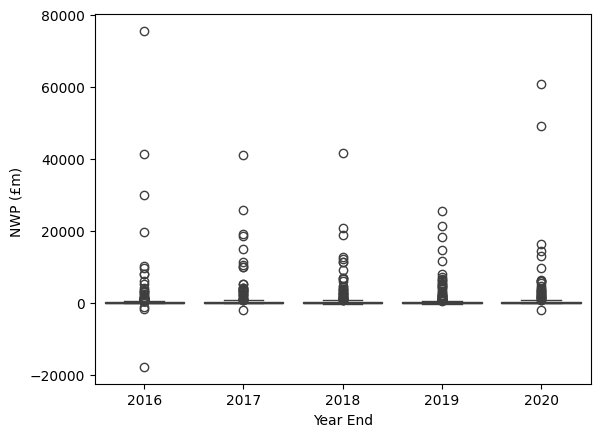

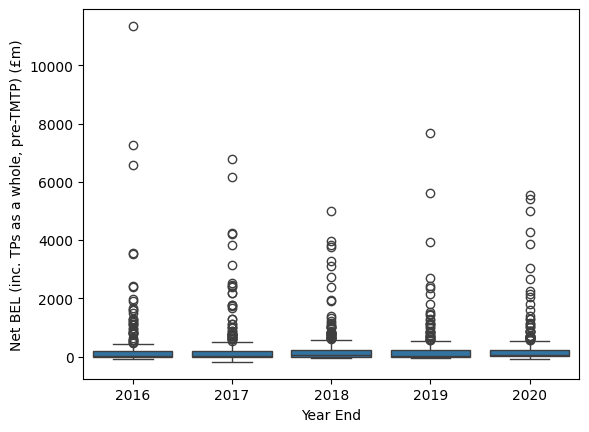

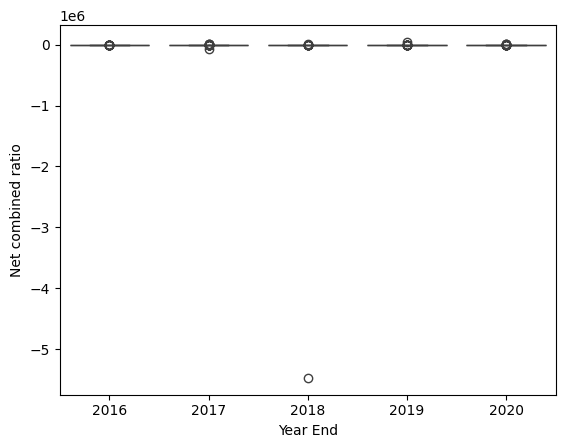

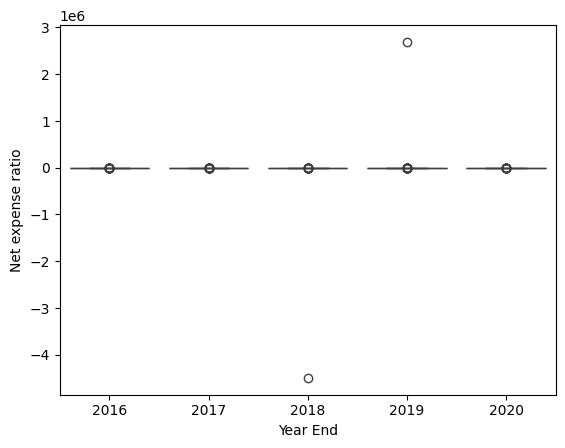

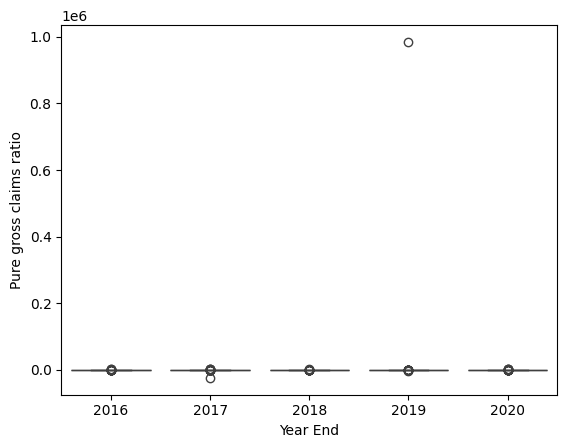

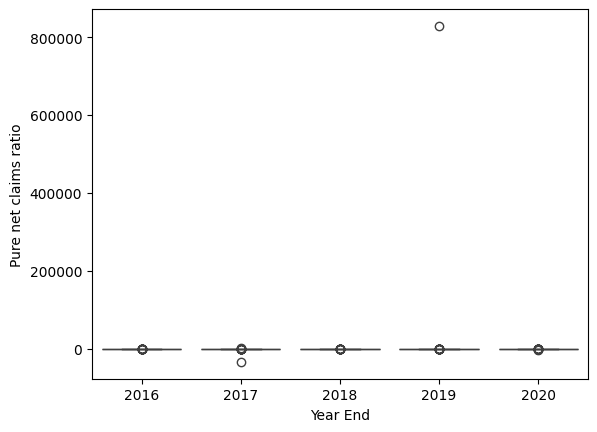

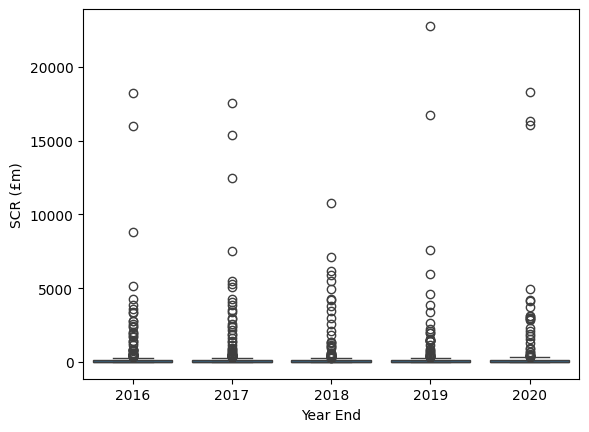

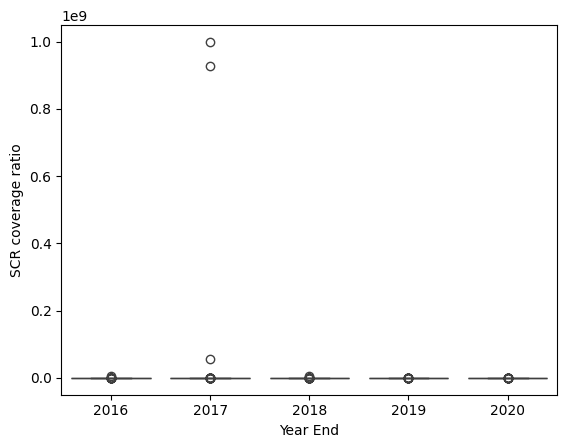

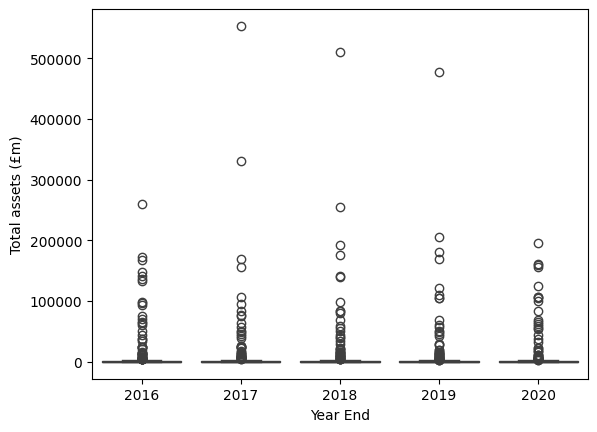

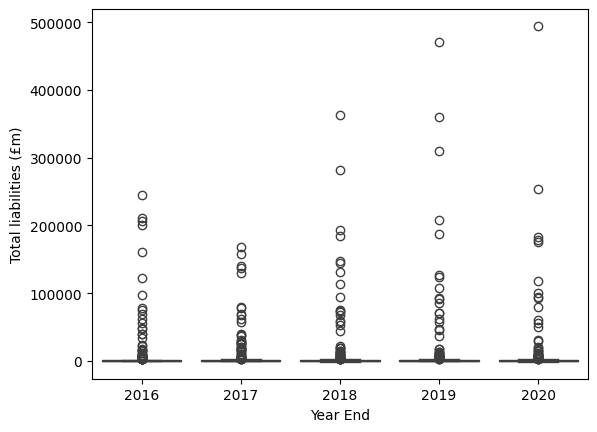

In [212]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('clean_dataset.csv')

# Configure data type to String
df['Year End'] = df['Year End'].astype(str)

# List numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

for column in numeric_cols:   
    sns.boxplot(data=df, x='Year End', y=column)
    plt.show()

These columns had very obvious outliers:

gross combination ratio, gross expense ratio, net combination ratio, net expense ratio, pure gross claims ratio, pure net claims ratio, SCR Coverage ratio

The data distribution for all columns also seem to be skewed (mostly to the right). Natural to have few big players and many small players in the insurance industry. 

Because it is a skewed distribution, I will use the interquartile range to identify them.

Since it is hard to differentiate between outlier and we want to find the big and risky firms to supervise, I will be very conservative and allow for a very high upper limit

In [213]:
# Calculate quantiles and IQR
Q1 = df[numeric_cols].quantile(0.25) 
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 20 * IQR
lower_limit = Q1 - 3 * IQR

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[numeric_cols] < (lower_limit)) | (df[numeric_cols] > (upper_limit))).any(axis=1)

# Create a dataframe of rows which fall outside limits
df_within_limit = df[condition]

df_outside_limit = df[~condition]

# Update conditions for firms which have have more than two rows outside limit:
for i, firm_names in df_outside_limit['Firm Name'].items():
    if len(df_outside_limit[df_outside_limit['Firm Name'] == firm_names]) > 1:
        condition[i]=True

# Filter our dataframe based on condition
df_no_outlier = df[condition]

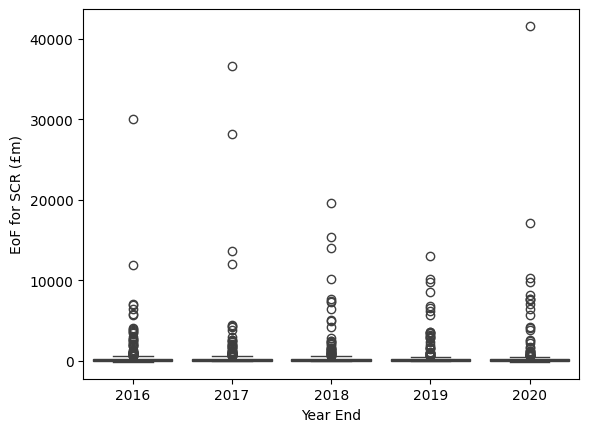

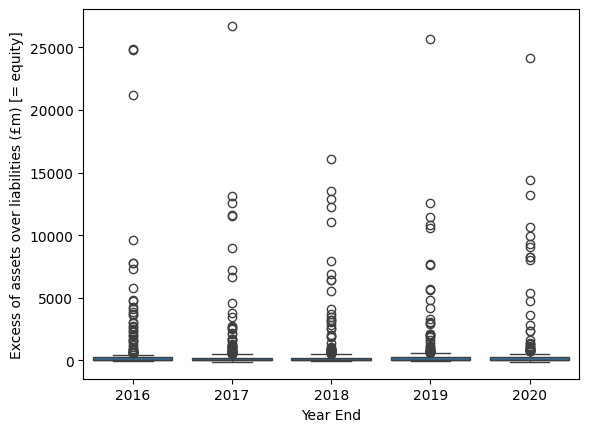

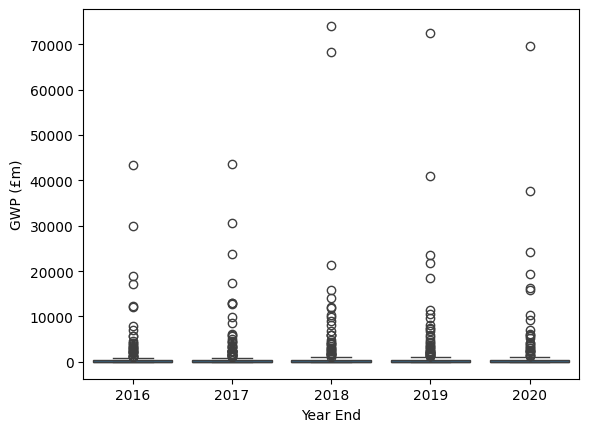

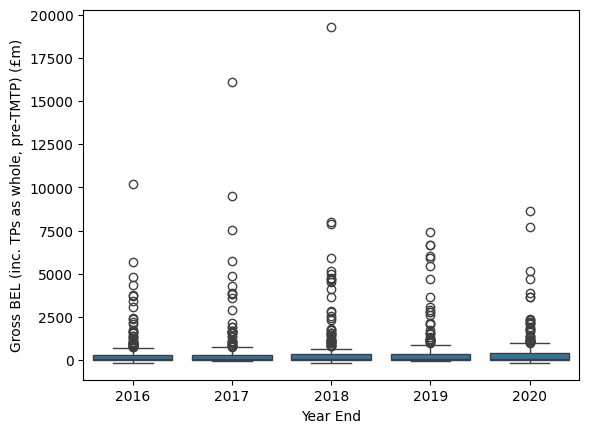

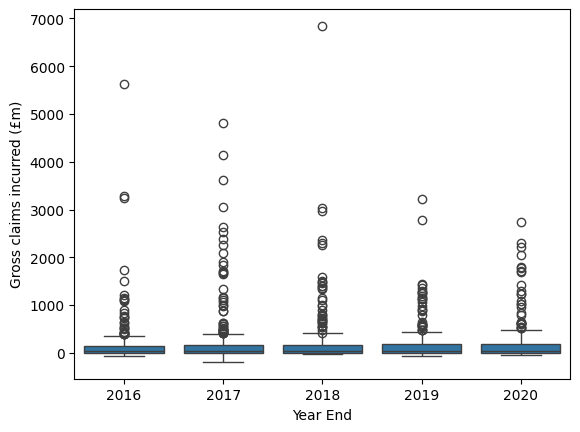

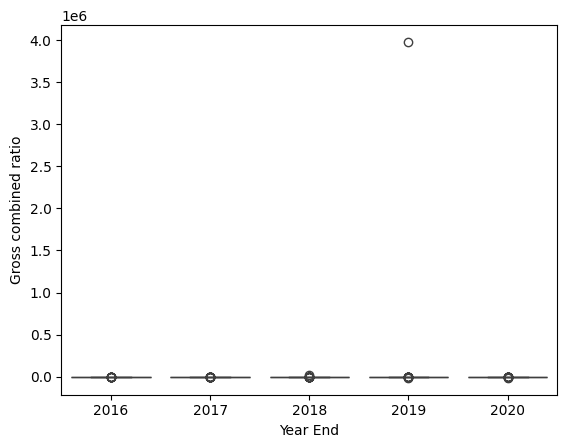

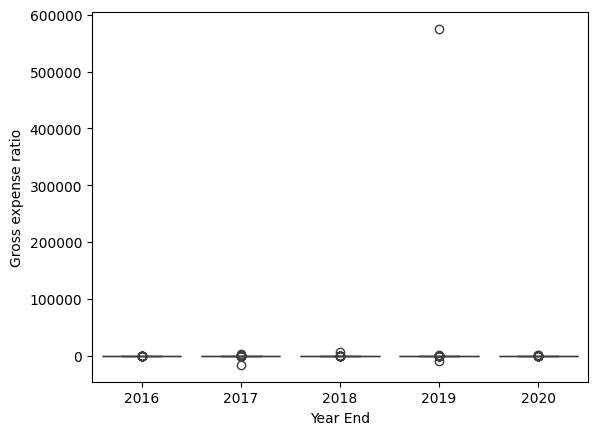

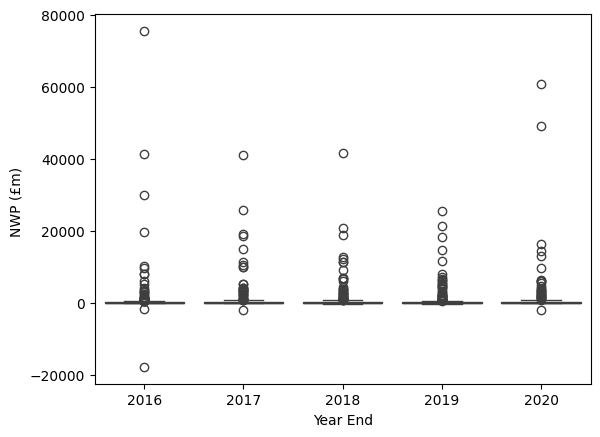

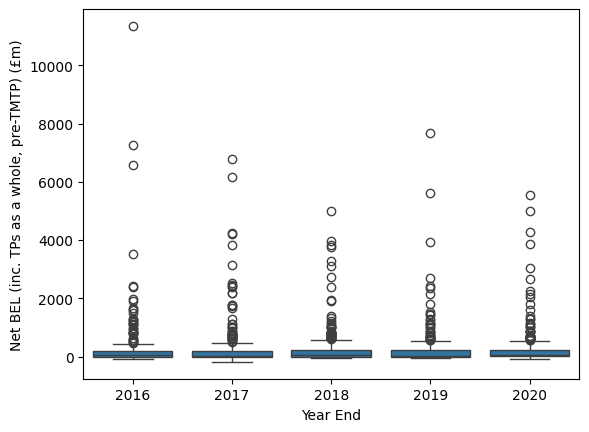

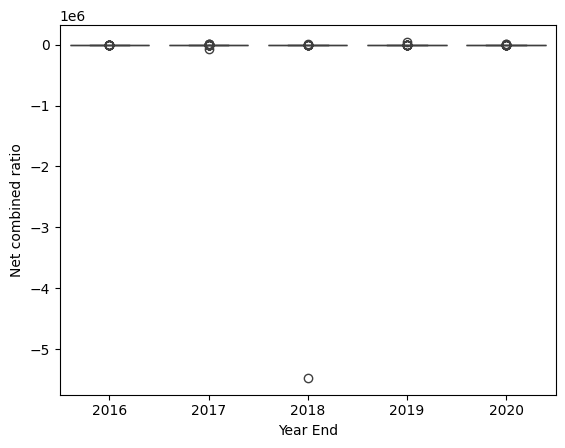

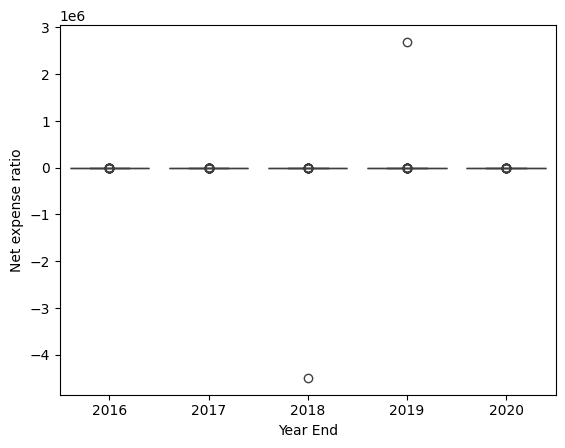

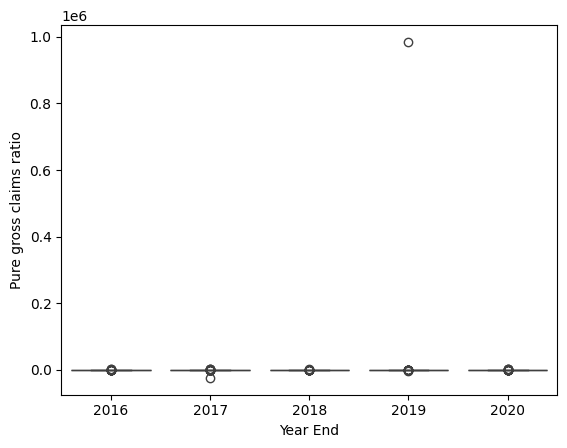

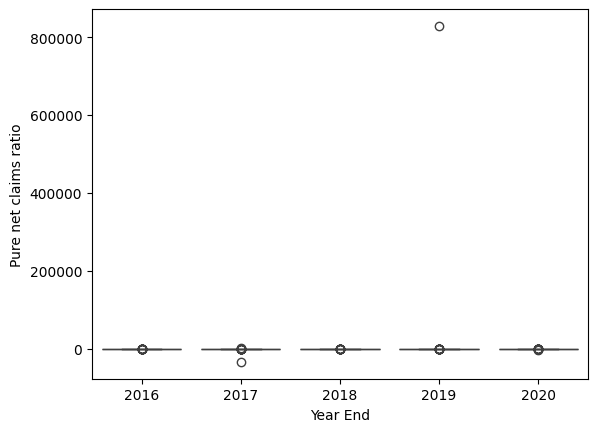

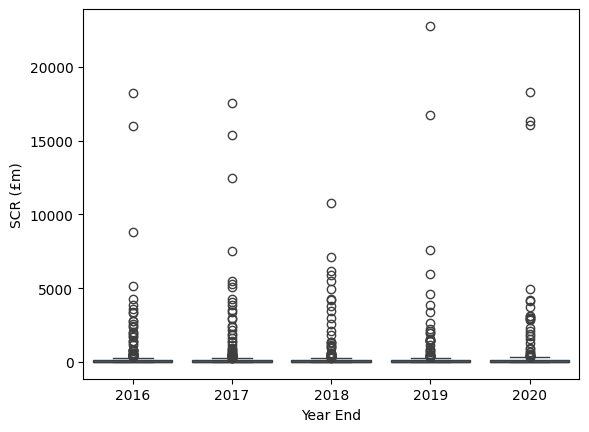

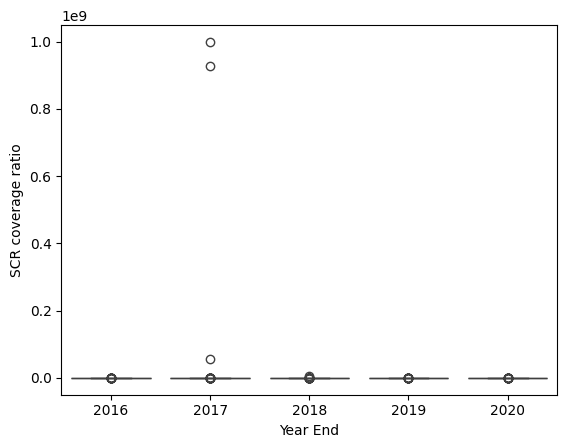

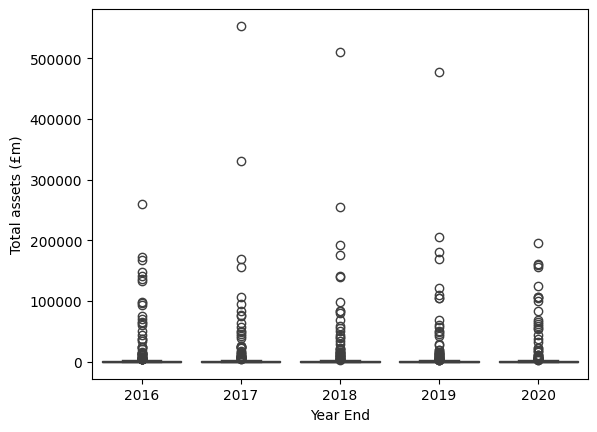

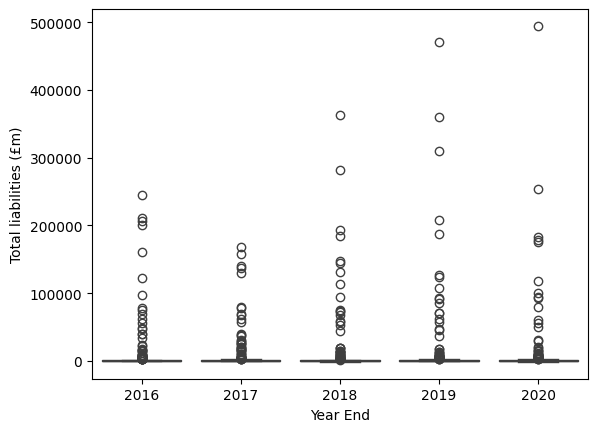

In [214]:
for cols in numeric_cols:   
    sns.boxplot(data=df_no_outlier, x='Year End', y=cols)
    plt.show()

In [215]:
df_no_outlier.to_csv('clean_dataset_2.csv', encoding='utf-8', index=False)

rows removed as a result of trimming:

2280-2253 = 27